In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Github/jspwiki/jspwiki_model.csv')

In [3]:
df['time'] = df['total_time'].astype('int64')

In [4]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time'
                                'total_time'
                                ])]

In [5]:
scaler = preprocessing.StandardScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [6]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [8]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 9


In [9]:
number_of_cluster.sort()
number_of_cluster

[[0.3062, 2],
 [0.3431, 3],
 [0.4059, 4],
 [0.4606, 5],
 [0.4821, 11],
 [0.4998, 10],
 [0.5, 12],
 [0.5, 13],
 [0.5, 14],
 [0.5, 15],
 [0.5254, 7],
 [0.5268, 6],
 [0.5461, 8],
 [0.551, 9]]

In [10]:
num_clusters = max(number_of_cluster)[1]
kmeans = KMeans(n_clusters=num_clusters)

In [11]:
cluster_labels = kmeans.fit_predict(X)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
df['cluster'] = cluster_labels

In [13]:
df['timedelta'] = pd.to_timedelta(df['total_time'])

In [14]:
df['timedelta'][:int(0.7 * len(df))].median()

Timedelta('7 days 15:29:07')

In [15]:
df.head(3)

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,time,cluster,timedelta
0,37bf55373ed5a739a388a720163cf51d1104537f,96b6b3f67c5915bac9c77bcd81fe5529d9b9e06b,1,0,9,8,522851000000000,1066,89,89,234,234,1066,86,86,234,461,522851000000000,1,6 days 01:14:11
1,402375b9cc0a5bddac483a557e2d7253d0fc1b5d,116c0c23629ab9f8b80befcf7f8f05bd15b0beeb,1,36,40,4,7097003000000000,1064,77,77,183,183,1054,77,77,183,458,7097003000000000,2,82 days 03:23:23
2,7b1d9eaaacd747d78482a2bd7d94784cc7443cb0,6256f8b8c4a147b676471ea96e26b33386b43f0f,1,2,0,2,16947264000000000,1055,78,78,188,188,1054,77,77,183,458,16947264000000000,0,196 days 03:34:24


In [16]:
df.shape

(83, 20)

In [17]:
df['timedelta'] = pd.to_timedelta(df['time'])

In [18]:
cluster_0 = df[df['cluster'] == 0]
print(cluster_0['timedelta'].min())
print(cluster_0['timedelta'].max())
cluster_0.shape

190 days 00:41:58
197 days 22:09:25


(3, 20)

In [19]:
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['timedelta'].min())
print(cluster_1['timedelta'].max())
cluster_1.shape

5 days 14:02:05
14 days 04:54:58


(18, 20)

In [20]:
cluster_2 = df[df['cluster'] == 2]
print(cluster_2['timedelta'].min())
print(cluster_2['timedelta'].max())
cluster_2.shape

79 days 00:03:25
86 days 02:25:46


(3, 20)

In [21]:
cluster_3 = df[df['cluster'] == 3]
print(cluster_3['timedelta'].min())
print(cluster_3['timedelta'].max())
cluster_3.shape

280 days 00:57:41
280 days 00:57:41


(1, 20)

In [22]:
cluster_4 = df[df['cluster'] == 4]
print(cluster_4['timedelta'].min())
print(cluster_4['timedelta'].max())
cluster_4.shape

0 days 00:01:30
5 days 04:28:32


(43, 20)

In [23]:
cluster_5 = df[df['cluster'] == 5]
print(cluster_5['timedelta'].min())
print(cluster_5['timedelta'].max())
cluster_5.shape

43 days 06:43:09
50 days 10:40:36


(2, 20)

In [24]:
cluster_6 = df[df['cluster'] == 6]
print(cluster_6['timedelta'].min())
print(cluster_6['timedelta'].max())
cluster_6.shape

157 days 23:02:25
168 days 22:03:58


(2, 20)

In [25]:
cluster_7 = df[df['cluster'] == 7]
print(cluster_7['timedelta'].min())
print(cluster_7['timedelta'].max())
cluster_7.shape

16 days 17:54:11
26 days 17:24:20


(10, 20)

In [26]:
cluster_8 = df[df['cluster'] == 8]
print(cluster_8['timedelta'].min())
print(cluster_8['timedelta'].max())
cluster_8.shape

99 days 02:15:42
99 days 02:15:42


(1, 20)

In [27]:
df.shape

(83, 20)

In [28]:
def remove_outliers_madn(data, threshold=2.24):
    median = np.median(data)
    mad = np.median(np.abs(data - median))

    # Calculate modified Z-score for each data point
    modified_z_scores = 0.6745 * (data - median) / mad

    # Identify and remove outliers based on the threshold
    filtered_data = data[abs(modified_z_scores) < threshold]

    return filtered_data

In [29]:
# Example usage
filtered_data = remove_outliers_madn(df_scaler, threshold=2.24)
print("Original data:", df_scaler)
print("Filtered data:", filtered_data)

Original data: [[-0.24997288 -0.24997288 -0.24997288 ... -0.24997288  2.34349573
   1.47900619]
 [-0.31511574 -0.14023353 -0.30540006 ... -0.30054222 -0.16452272
   0.02979085]
 [-0.25060098 -0.05425618 -0.30760431 ... -0.2886032  -0.13659432
   0.11675381]
 ...
 [ 3.03745864  0.60185295  0.60185295 ...  0.98390875  0.98390875
   0.98390875]
 [ 1.24211525  1.16990262  1.16990262 ... -0.53912964 -0.53912964
  -0.53912964]
 [-0.35733759  1.07353796  3.21746429 ... -0.46528196 -0.28724982
  -0.07620229]]
Filtered data: [-0.24997288 -0.24997288 -0.24997288 ... -0.46528196 -0.28724982
 -0.07620229]


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


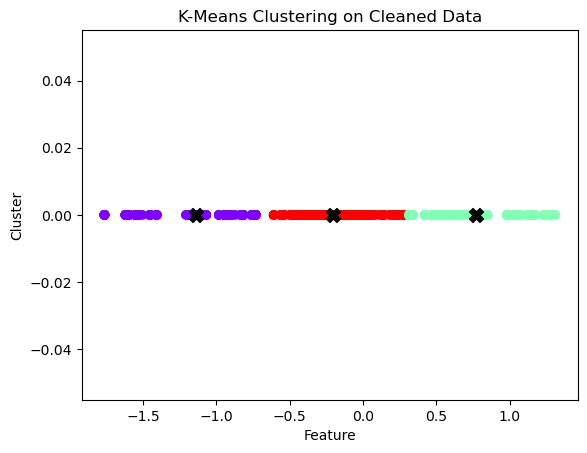

In [30]:
# Reshape the data to a 2D array if needed
cleaned_data = filtered_data.reshape(-1, 1)

# Specify the number of clusters you want to find
n_clusters = 3

# Initialize and fit K-Means model
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(cleaned_data)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(cleaned_data, np.zeros_like(cleaned_data), c=labels, cmap='rainbow')
plt.scatter(cluster_centers, np.zeros_like(cluster_centers), marker='X', color='black', s=100)
plt.title('K-Means Clustering on Cleaned Data')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [37]:
cleaned_data

array([[-0.24997288],
       [-0.24997288],
       [-0.24997288],
       ...,
       [-0.46528196],
       [-0.28724982],
       [-0.07620229]])

In [31]:
cluster_labels_x = kmeans.fit_predict(cleaned_data)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [32]:
df.head(1)

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,time,cluster,timedelta
0,37bf55373ed5a739a388a720163cf51d1104537f,96b6b3f67c5915bac9c77bcd81fe5529d9b9e06b,1,0,9,8,522851000000000,1066,89,89,234,234,1066,86,86,234,461,522851000000000,1,6 days 01:14:11


In [39]:
df.head(1)

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,time,cluster,timedelta
0,37bf55373ed5a739a388a720163cf51d1104537f,96b6b3f67c5915bac9c77bcd81fe5529d9b9e06b,1,0,9,8,522851000000000,1066,89,89,234,234,1066,86,86,234,461,522851000000000,1,6 days 01:14:11


In [33]:
time_score = df['timedelta']
time_score = pd.DataFrame(time_score)

In [41]:
time_score

,timedelta
0,6 days 01:14:11
1,82 days 03:23:23
2,196 days 03:34:24
3,190 days 00:41:58
4,157 days 23:02:25
...,...
78,17 days 12:35:30
79,10 days 02:00:23
80,0 days 07:28:21
81,9 days 18:41:09


In [35]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary_1 = dataframe[col_name].mean() + 1 * dataframe[col_name].std()
    lower_boundary_1 = dataframe[col_name].mean() - 1 * dataframe[col_name].std()
    upper_boundary_2 = dataframe[col_name].mean() + 2 * dataframe[col_name].std()
    lower_boundary_2 = dataframe[col_name].mean() - 2 * dataframe[col_name].std()
    return upper_boundary_1, upper_boundary_2 , lower_boundary_1, lower_boundary_2

In [36]:
determine_outlier_thresholds_std(time_score, time_score.columns)

(timedelta   78 days 13:17:43.474523061
 dtype: timedelta64[ns],
 timedelta   132 days 01:18:09.816516002
 dtype: timedelta64[ns],
 timedelta   -29 days +13:16:50.790537179
 dtype: timedelta64[ns],
 timedelta   -82 days +01:16:24.448544238
 dtype: timedelta64[ns])